In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np

# DATA

In [2]:
from torchvision import transforms

In [3]:
from torch.utils.data import random_split

train_images = MNIST(root='./data', train=True, download=True)
train_data = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

val_and_test_data = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
val_data, test_data = random_split(val_and_test_data, [5000, 5000])

print(f"training set len: {len(train_data)}")
print(f"val set len: {len(val_data)}")
print(f"test set len: {len(test_data)}")

training set len: 60000
val set len: 5000
test set len: 5000


In [4]:
len(test_data) / len(train_data)

0.08333333333333333

In [5]:
def show_data_samples(data):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 4, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)    
        plt.axis("off")
        plt.imshow(img, cmap="gray")
    plt.show()

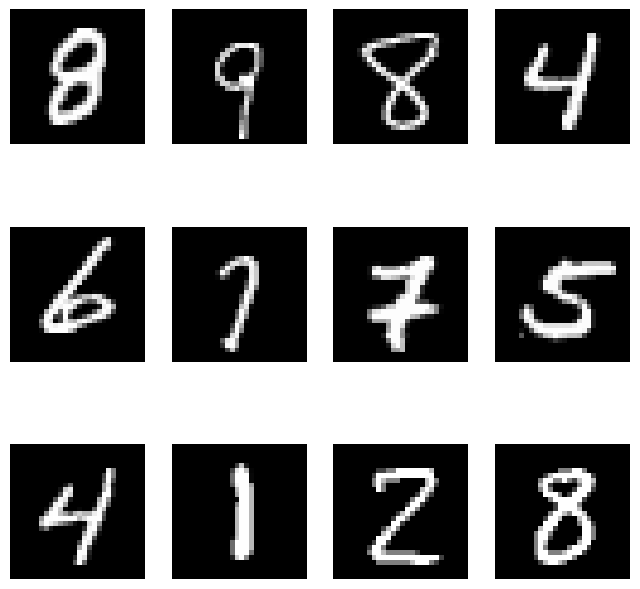

In [6]:
show_data_samples(train_images)

In [7]:
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10,
                                            shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=10,
                                            shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1,
                                            shuffle=True, num_workers=1)

# MODEL

In [8]:
from torch import nn

class NeuralNetwork(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28, 128),
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

# TRAINING

In [11]:
def train(model, data, config):
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    
    data_train = data["train"]
    data_val = data["val"]
    
    stats = {
        'train_losses': [],
        'val_losses': []
    }
    
    for epoch in range(config["num_epochs"]):
        print(f"Starting epoch {epoch+1}")
                    
        train_loss = 0
        for i, data in enumerate(data_train):

            # Get inputs
            inputs, targets = data
  
            # Zero the gradients
            optimizer.zero_grad()
  
            # Perform forward pass
            outputs = model(inputs)
  
            # Compute loss
            loss = loss_function(outputs, targets)
  
            # Perform backward pass
            loss.backward()
  
            # Perform optimization
            optimizer.step()
  
            # Print statistics
            train_loss += loss.item()
            if i % 500 == 499:
                print('Loss after mini-batch %5d: %.3f' % (i + 1, train_loss / i))    
                
        stats['train_losses'].append(train_loss / len(data_train))
        
        val_loss = 0
        for i, data in enumerate(data_val):      
            # Get inputs
            inputs, targets = data
  
            outputs = model(inputs)
            val_loss += loss_function(outputs, targets).item()

        average_loss = val_loss / len(data_val)
        stats['val_losses'].append(average_loss)
        
        print(f"Average Val loss: {average_loss}")
            
    print("FINISHED TRAINING")
    
    return stats

In [16]:
config = {
    "lr": 1e-4,
    "num_epochs": 20
}
data = { 
    "train": train_loader,
    "val": val_loader
}

In [20]:
model_20 = NeuralNetwork()

In [21]:
stats = train(model_20, data, config)

Starting epoch 1
Loss after mini-batch   500: 1.911
Loss after mini-batch  1000: 1.378
Loss after mini-batch  1500: 1.106
Loss after mini-batch  2000: 0.947
Loss after mini-batch  2500: 0.852
Loss after mini-batch  3000: 0.779
Loss after mini-batch  3500: 0.722
Loss after mini-batch  4000: 0.678
Loss after mini-batch  4500: 0.643
Loss after mini-batch  5000: 0.617
Loss after mini-batch  5500: 0.590
Loss after mini-batch  6000: 0.568
Average Val loss: 0.3105071886368096
Starting epoch 2
Loss after mini-batch   500: 0.312
Loss after mini-batch  1000: 0.314
Loss after mini-batch  1500: 0.305
Loss after mini-batch  2000: 0.297
Loss after mini-batch  2500: 0.297
Loss after mini-batch  3000: 0.294
Loss after mini-batch  3500: 0.294
Loss after mini-batch  4000: 0.292
Loss after mini-batch  4500: 0.290
Loss after mini-batch  5000: 0.288
Loss after mini-batch  5500: 0.285
Loss after mini-batch  6000: 0.283
Average Val loss: 0.2324881752859801
Starting epoch 3
Loss after mini-batch   500: 0.256


Loss after mini-batch  2000: 0.031
Loss after mini-batch  2500: 0.032
Loss after mini-batch  3000: 0.032
Loss after mini-batch  3500: 0.033
Loss after mini-batch  4000: 0.034
Loss after mini-batch  4500: 0.033
Loss after mini-batch  5000: 0.032
Loss after mini-batch  5500: 0.032
Loss after mini-batch  6000: 0.032
Average Val loss: 0.08320214639859477
Starting epoch 19
Loss after mini-batch   500: 0.021
Loss after mini-batch  1000: 0.023
Loss after mini-batch  1500: 0.026
Loss after mini-batch  2000: 0.028
Loss after mini-batch  2500: 0.028
Loss after mini-batch  3000: 0.029
Loss after mini-batch  3500: 0.027
Loss after mini-batch  4000: 0.028
Loss after mini-batch  4500: 0.028
Loss after mini-batch  5000: 0.029
Loss after mini-batch  5500: 0.028
Loss after mini-batch  6000: 0.029
Average Val loss: 0.08045189043607388
Starting epoch 20
Loss after mini-batch   500: 0.021
Loss after mini-batch  1000: 0.024
Loss after mini-batch  1500: 0.025
Loss after mini-batch  2000: 0.025
Loss after mi

In [31]:
# SAVING MODEL
torch.save(model_20, "models/model_20.pt")

In [32]:
# LOADING MODEL
model_20_l = torch.load("models/model_20.pt")

In [14]:
train(model, data, config)

Starting epoch 1
Loss after mini-batch   500: 1.904
Loss after mini-batch  1000: 0.910
Loss after mini-batch  1500: 0.615
Loss after mini-batch  2000: 0.498
Loss after mini-batch  2500: 0.446
Loss after mini-batch  3000: 0.405
Loss after mini-batch  3500: 0.375
Loss after mini-batch  4000: 0.355
Loss after mini-batch  4500: 0.351
Loss after mini-batch  5000: 0.328
Loss after mini-batch  5500: 0.310
Loss after mini-batch  6000: 0.308
Average Val loss: 0.28725993633270264
Starting epoch 2
Loss after mini-batch   500: 0.287
Loss after mini-batch  1000: 0.275
Loss after mini-batch  1500: 0.279
Loss after mini-batch  2000: 0.272
Loss after mini-batch  2500: 0.258
Loss after mini-batch  3000: 0.264
Loss after mini-batch  3500: 0.253
Loss after mini-batch  4000: 0.247
Loss after mini-batch  4500: 0.247
Loss after mini-batch  5000: 0.252
Loss after mini-batch  5500: 0.242
Loss after mini-batch  6000: 0.236
Average Val loss: 0.21383152902126312
Starting epoch 3
Loss after mini-batch   500: 0.20

In [23]:
def show_stats(stats):
    x_axis = range(1, len(stats['train_losses']) + 1)
    plt.plot(x_axis, stats['train_losses'], label='train')
    plt.plot(x_axis, stats['val_losses'], label='val')
    plt.legend()
    plt.xlabel("training epoch")
    plt.ylabel("loss")
    plt.show()

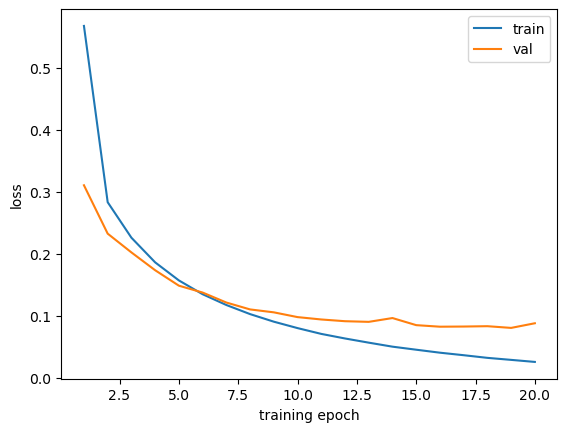

In [24]:
show_stats(stats)

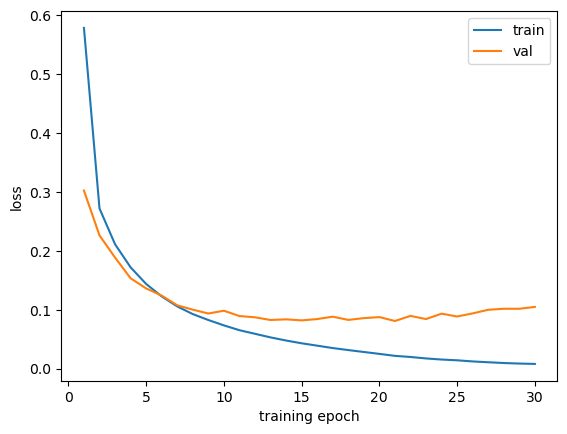

In [24]:
stats_30 = np.load('stats/stats_30.npy', allow_pickle=True).item()
show_stats(stats_30)

# Inference testing

In [25]:
def test_model(model, data_loader):
    total_correct = 0
    mistakes = []
    for i, data in enumerate(data_loader, 0):
        # Get inputs
        inputs, targets = data
        
        outputs = model(inputs)
        
        guesses = torch.argmax(outputs, dim=1)
        num_correct = torch.sum(guesses == targets)
        total_correct += num_correct
        
        if (num_correct != len(targets)): 
            mistake_mask = guesses != targets
            mistake_inputs = inputs[mistake_mask]
            mistake_targets = targets[mistake_mask]
            mistake_outputs = guesses[mistake_mask]
            mistakes.append((mistake_inputs, mistake_targets, mistake_outputs))

    print(f"correct guesses: {total_correct}/{len(data_loader.dataset)} ({total_correct / len(data_loader.dataset) * 100}%)")
    
    return mistakes

In [34]:
mistakes = test_model(model_20_l, train_loader)

correct guesses: 59669/60000 (99.44833374023438%)


In [27]:
def plot_mistake(mistake):
    inputs, targets, outputs = mistake
    plt.imshow(inputs[0][0], cmap="gray")
    plt.title(f"Guess: {outputs[0]}, Actual: {targets[0]}")

def plot_mistakes(mistakes):
    if (len(mistakes) == 0):
        return    
        
    figure = plt.figure(figsize=(10, 8))
    cols, rows = 4, 3    
    
    for i in range(1, cols * rows + 1):        
        figure.add_subplot(rows, cols, i)
        sample_idx = torch.randint(len(mistakes), size=(1,)).item()
        
        plot_mistake(mistakes[sample_idx])                
        
    plt.show()

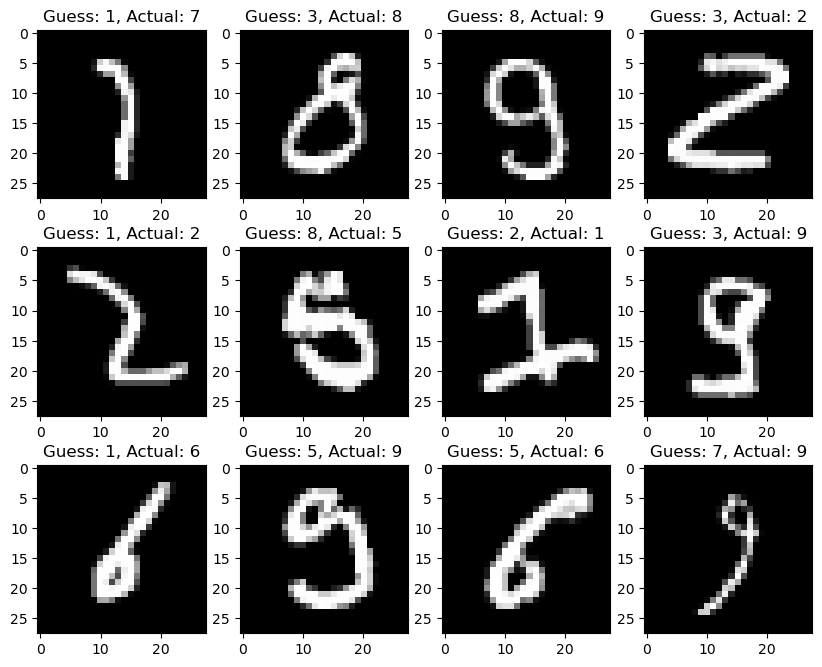

In [28]:
plot_mistakes(mistakes)